In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import WeatherGetter, Cleaning, Graphs

pd.options.display.max_rows = 999

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

Data Import

Data gathered from Nordpool Day Ahead historical data

In [3]:
df1 = pd.read_html('data/n2ex-day-ahead-auction-prices_2013_hourly_gbp.xls')
df2 = pd.read_html('data/n2ex-day-ahead-auction-prices_2014_hourly_gbp.xls')
df3 = pd.read_html('data/n2ex-day-ahead-auction-prices_2015_hourly_gbp.xls')
df4 = pd.read_html('data/n2ex-day-ahead-auction-prices_2016_hourly_gbp.xls')
df5 = pd.read_html('data/n2ex-day-ahead-auction-prices_2017_hourly_gbp.xls')
df6 = pd.read_html('data/n2ex-day-ahead-auction-prices_2018_hourly_gbp.xls')
df7 = pd.read_html('data/n2ex-day-ahead-auction-prices_2019_hourly_gbp.xls')


# Data Cleaning

In [4]:
cleaner = Cleaning()


df1 = cleaner.clean_df(df1)
df2 = cleaner.clean_df(df2)
df3 = cleaner.clean_df(df3)
df4 = cleaner.clean_df(df4)
df5 = cleaner.clean_df(df5)
df6 = cleaner.clean_df(df6)
df7 = cleaner.clean_df(df7)

result = df1.append([df2, df3, df4, df5, df6, df7])

In [5]:
result = cleaner.datetime_fixer(result)


# result.to_csv('refixed_price_only_timeseries.csv') # save result as a timeseries csv

# Exploratory Data Analysis

### Visualising all prices over time

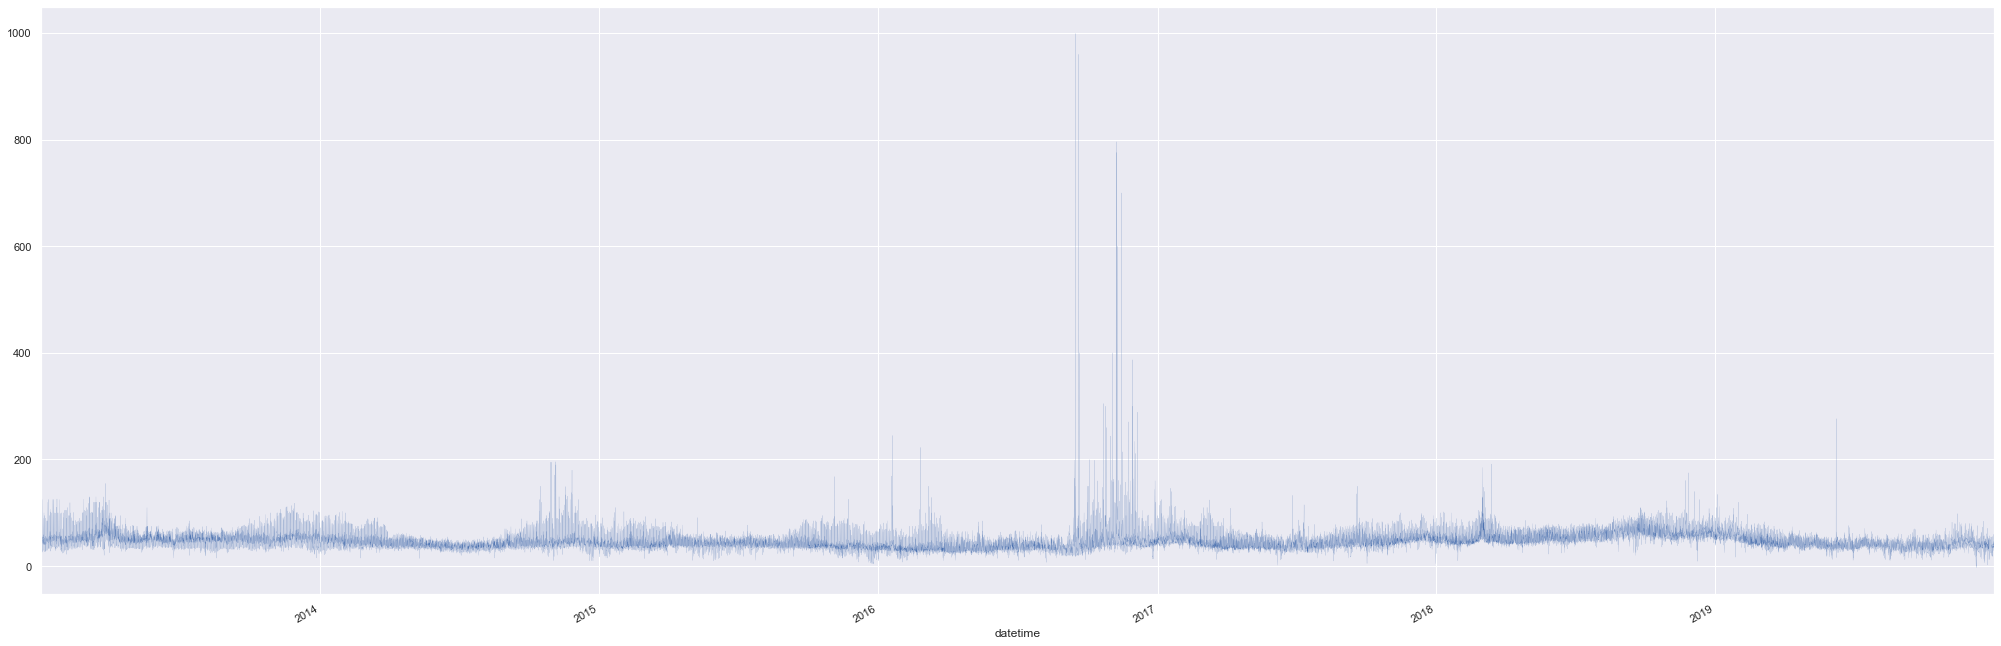

In [6]:
sns.set(rc={'figure.figsize':(35, 12)})
result['GBP/mWh'].plot(linewidth=0.1);


In [7]:
# Calculating rolling mean and standard deviation for stationarity checks

roll_mean = result['GBP/mWh'].rolling(window=4, center=False).mean()
roll_std = result['GBP/mWh'].rolling(window=4, center=False).std()

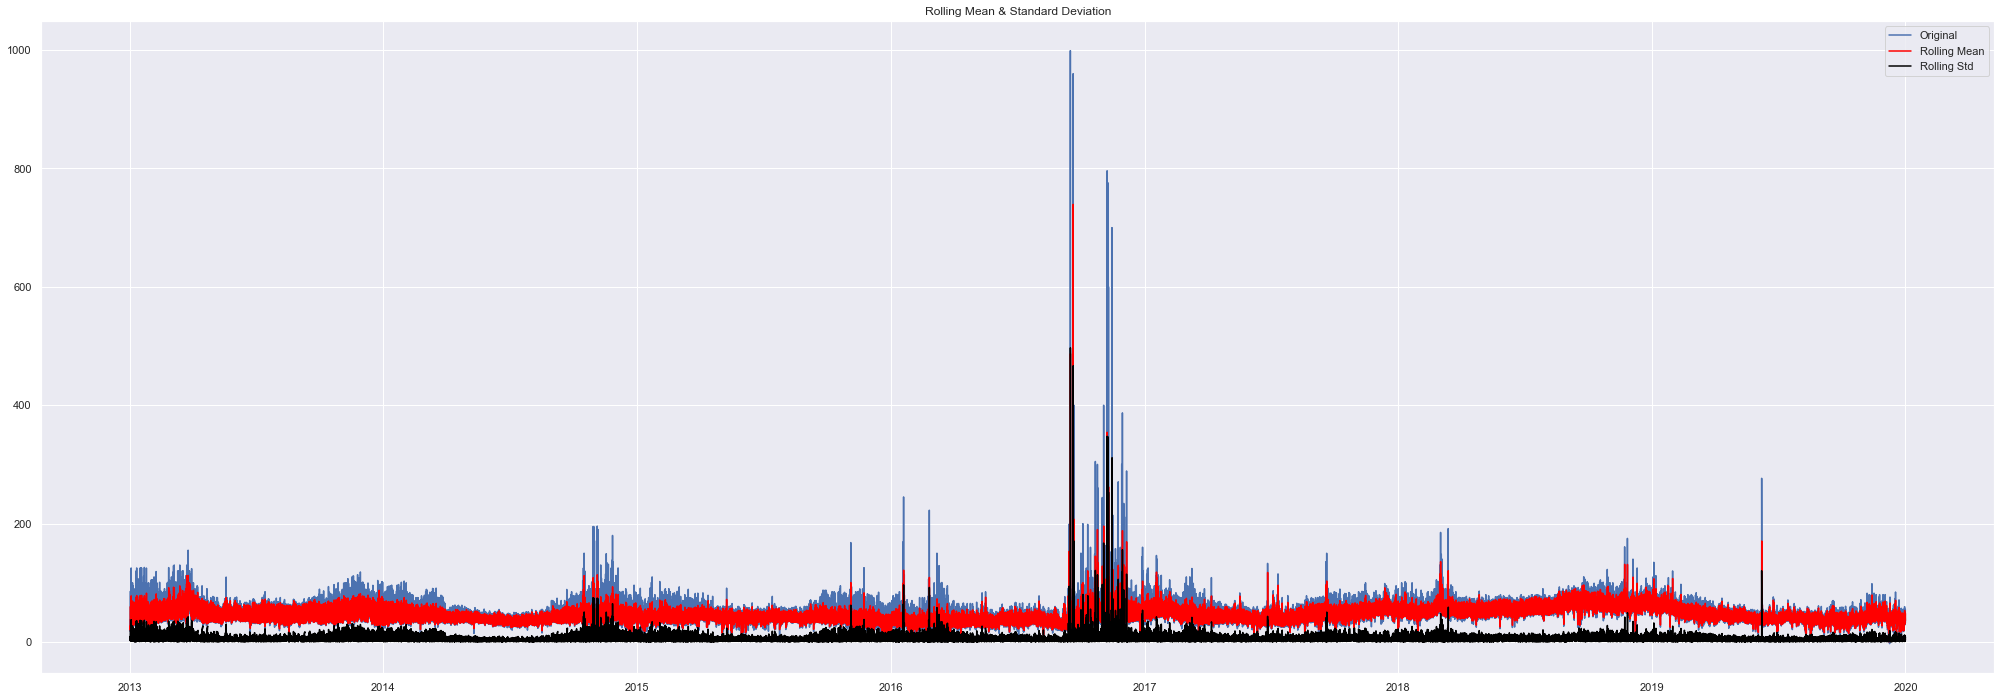

In [9]:
fig = plt.figure(figsize=(35,12))
plt.plot(result['GBP/mWh'], label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## The graph above is difficult to read properly. 
## Taking Averages helps to vizualise the trends over time.

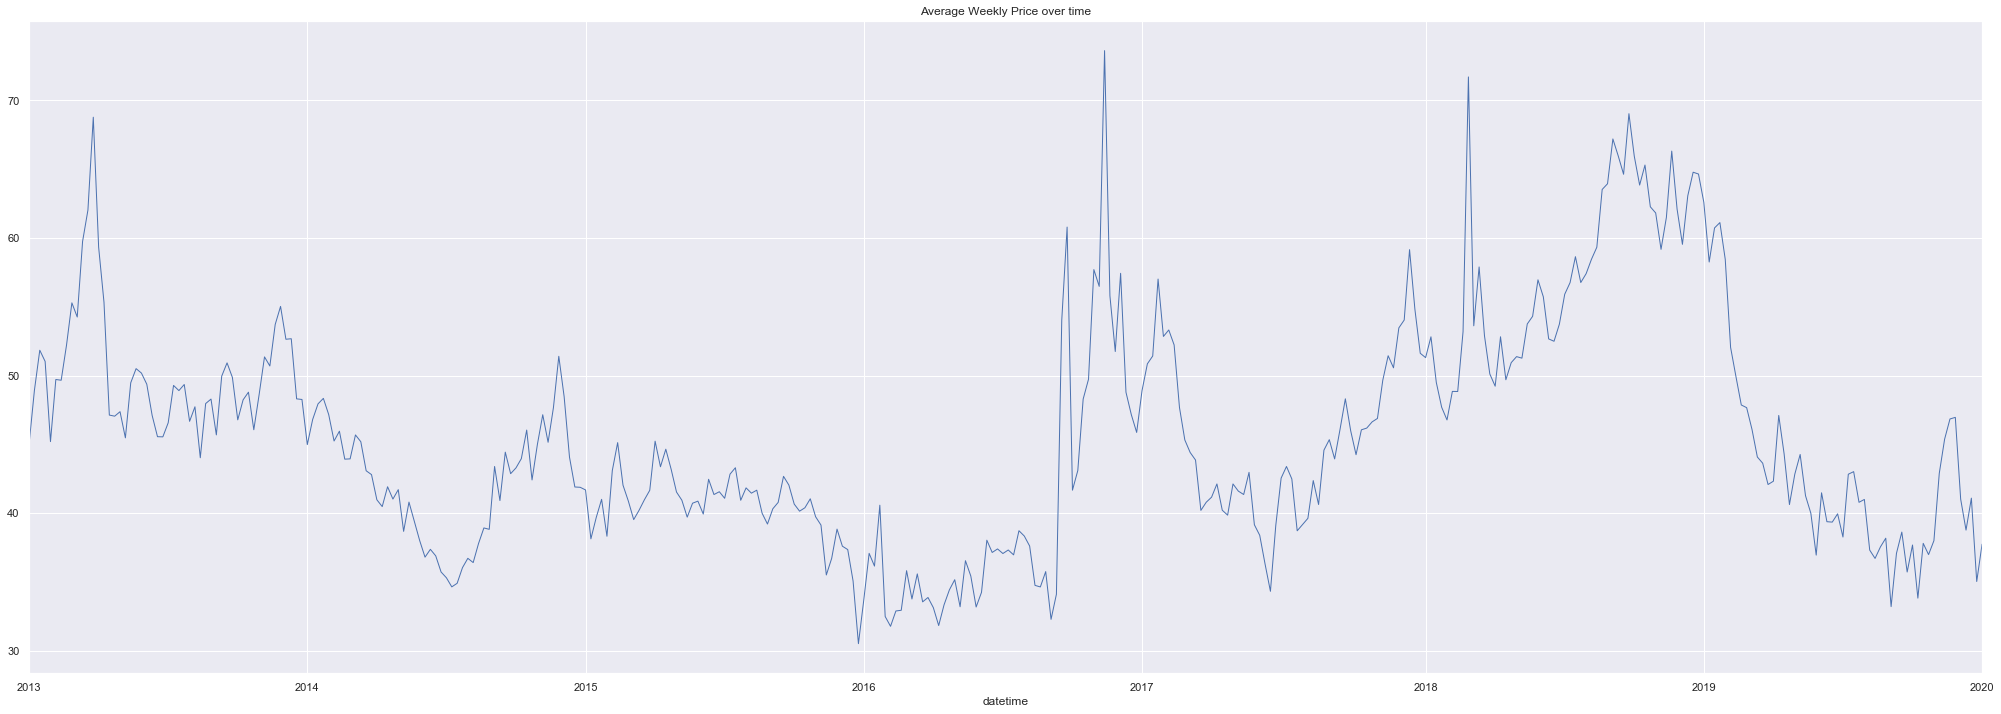

In [10]:
price_weekly = result.resample('W')
weekly_mean = price_weekly.mean()
sns.set(rc={'figure.figsize':(35, 12)})
weekly_mean['GBP/mWh'].plot(linewidth=1, title = 'Average Weekly Price over time');

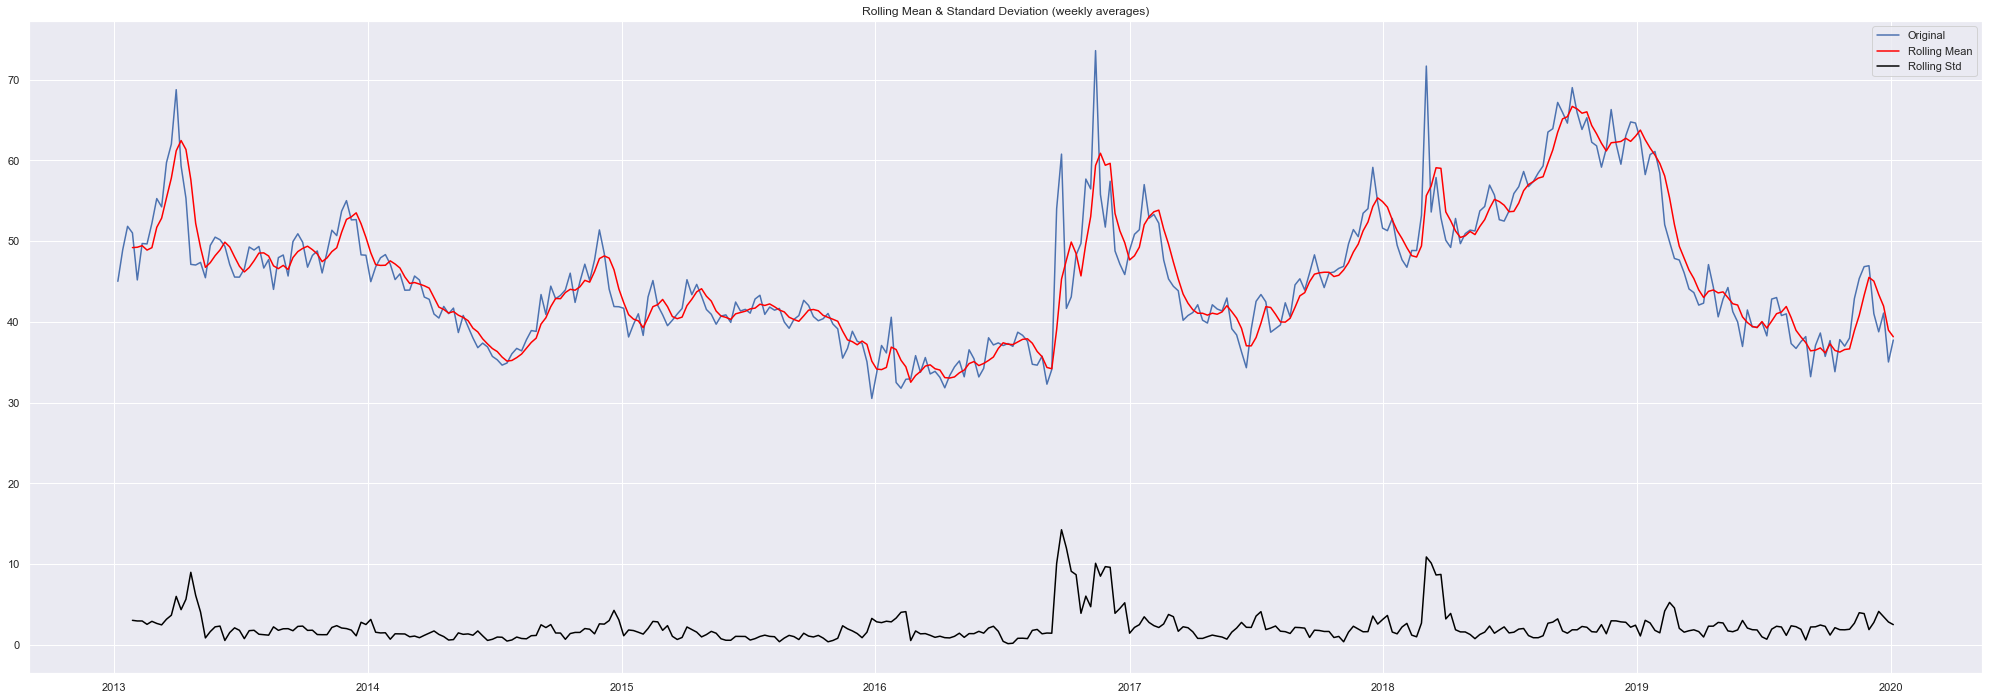

In [11]:
weekly_roll_mean = weekly_mean['GBP/mWh'].rolling(window=4, center=False).mean()
weekly_roll_std = weekly_mean['GBP/mWh'].rolling(window=4, center=False).std()


fig = plt.figure(figsize=(35, 12))
plt.plot(weekly_mean['GBP/mWh'], label='Original')
plt.plot(weekly_roll_mean, color='red', label='Rolling Mean')
plt.plot(weekly_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (weekly averages)')
plt.show(block=False)

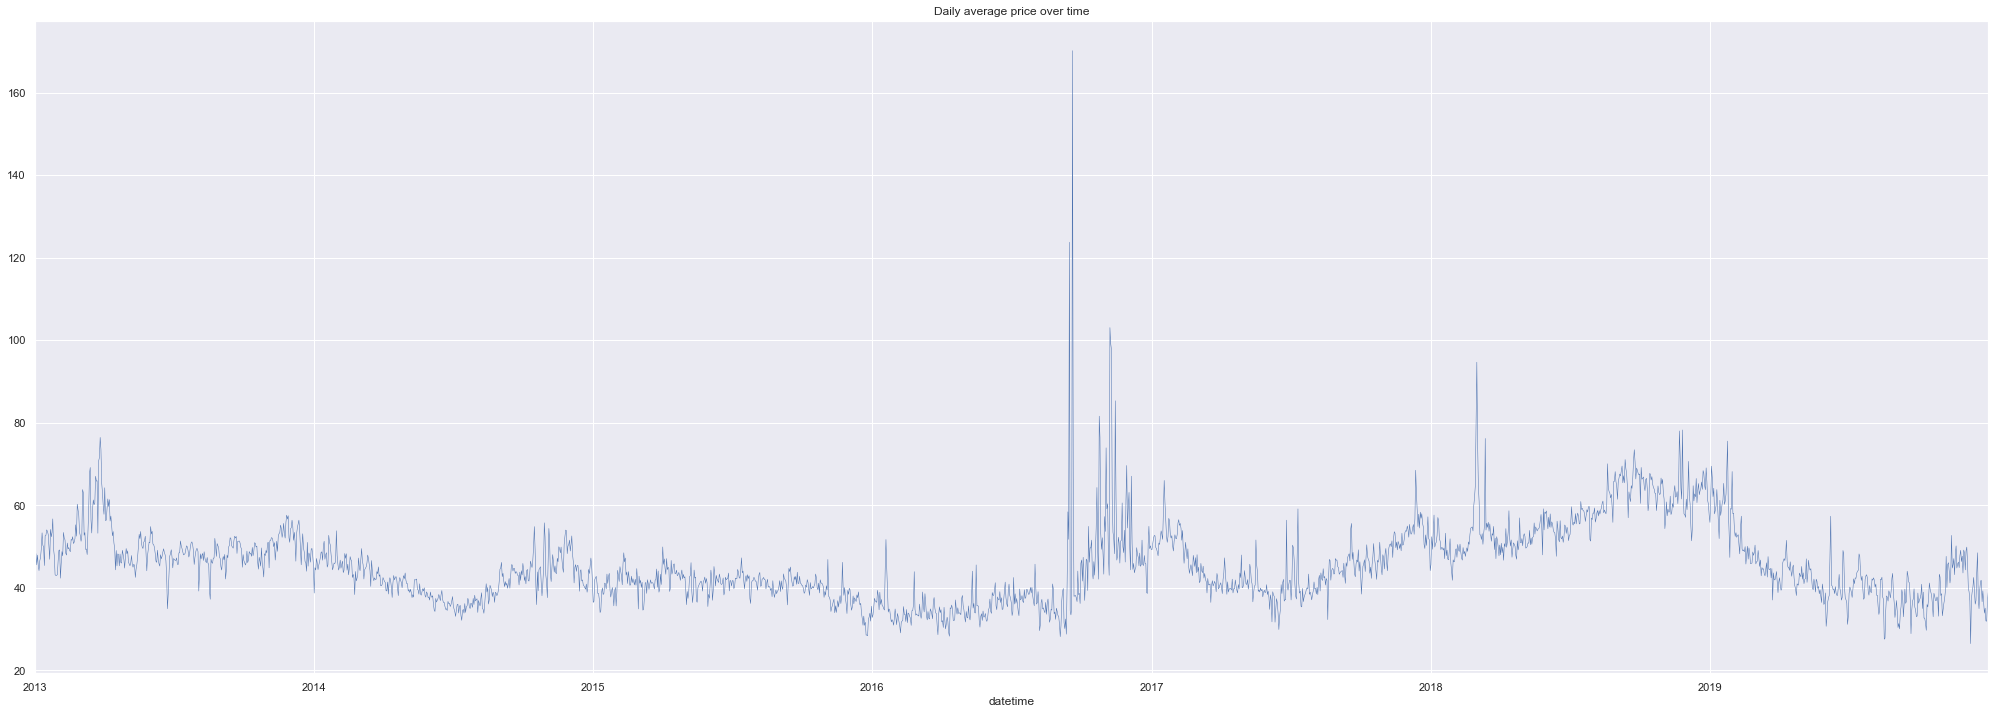

In [12]:
price_daily = result.resample('D')
daily_mean = price_daily.mean()
sns.set(rc={'figure.figsize':(35, 12)})
daily_mean['GBP/mWh'].plot(linewidth=0.5, title = 'Daily average price over time');

# One day of Price Change

Text(0, 0.5, 'Daily Price')

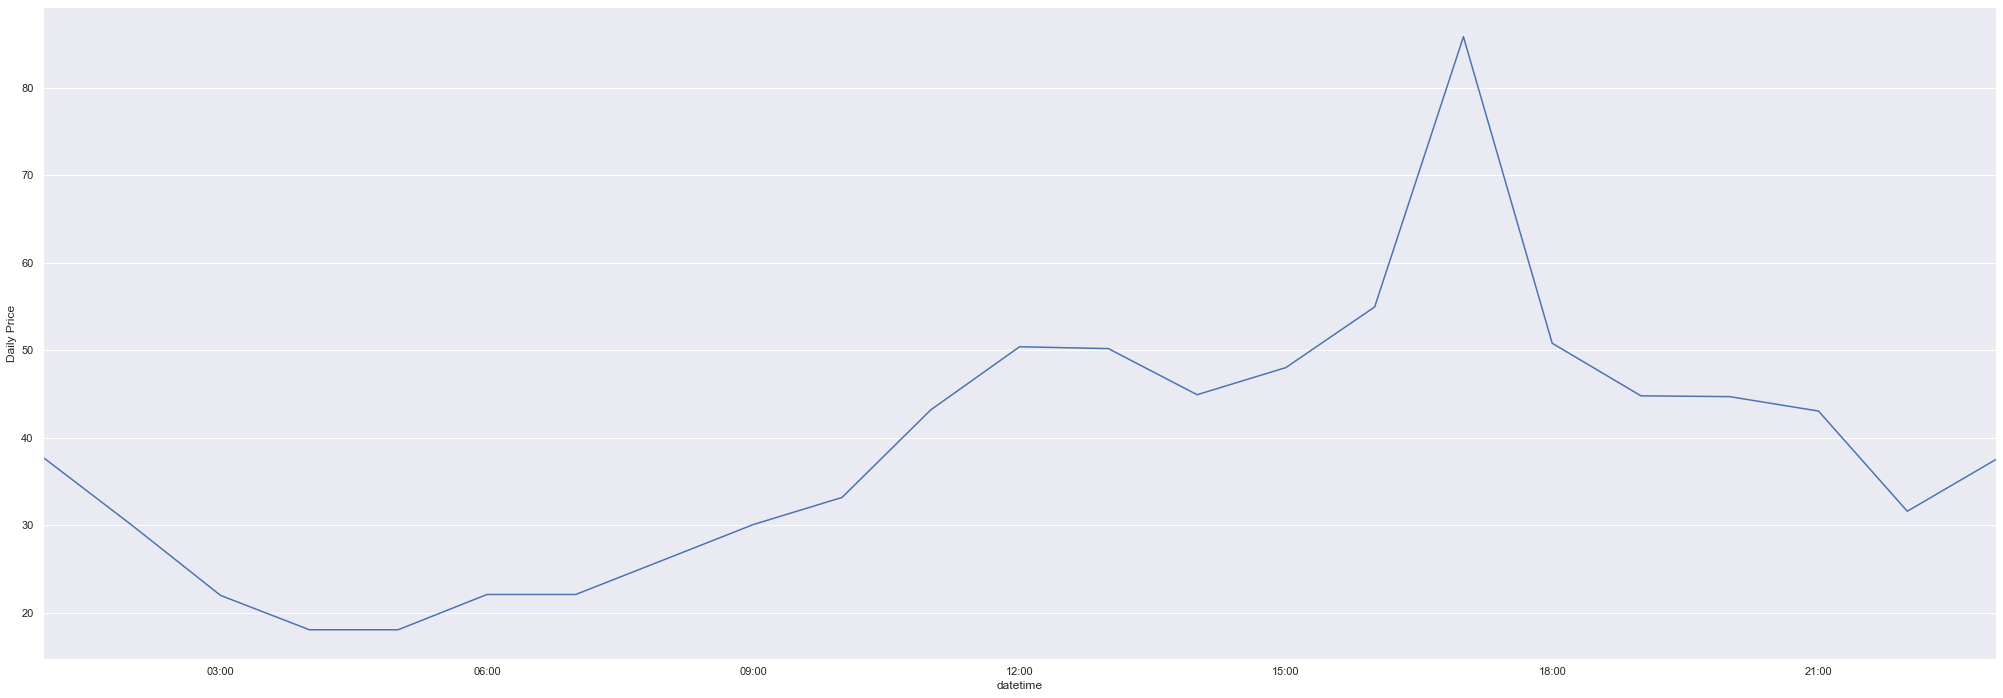

In [13]:
ax = result.loc['2013-01-01', 'GBP/mWh'].plot()
ax.set_ylabel('Daily Price')


# Average daily electricity price change by year

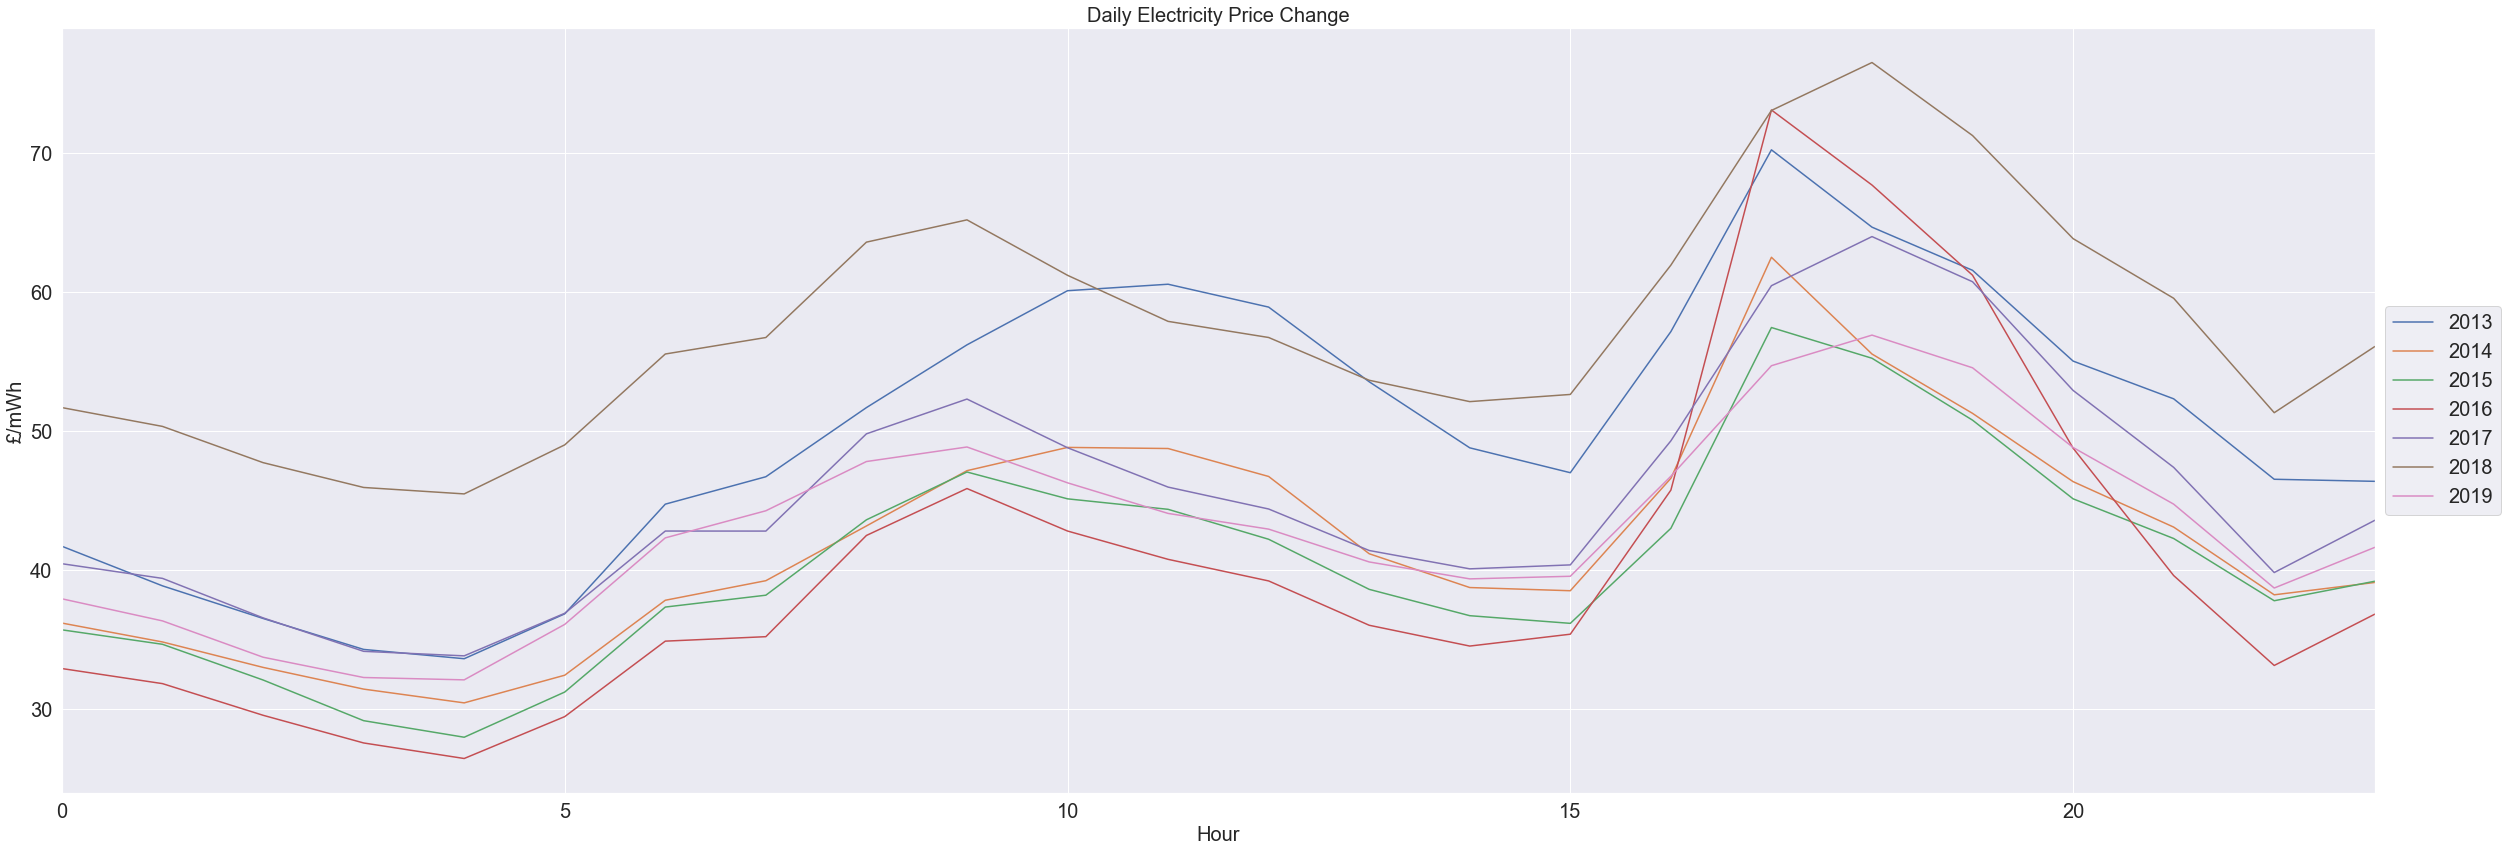

<Figure size 2520x864 with 0 Axes>

In [14]:

df_pivot = pd.pivot_table(result, index=result.index.hour, columns=result.index.year, values='GBP/mWh')

ax = df_pivot.plot(title='Data by Year', figsize=(35, 12))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5) ,prop={'size': 20})
ax.set_ylabel('£/mWh', fontsize=20)
ax.set_xlabel('Hour', fontsize=20)

ax.set_title('Daily Electricity Price Change', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.figure.tight_layout()
plt.show()
plt.savefig(fname = 'spaghetti.png')

# Electricity Prices monthly averages by year

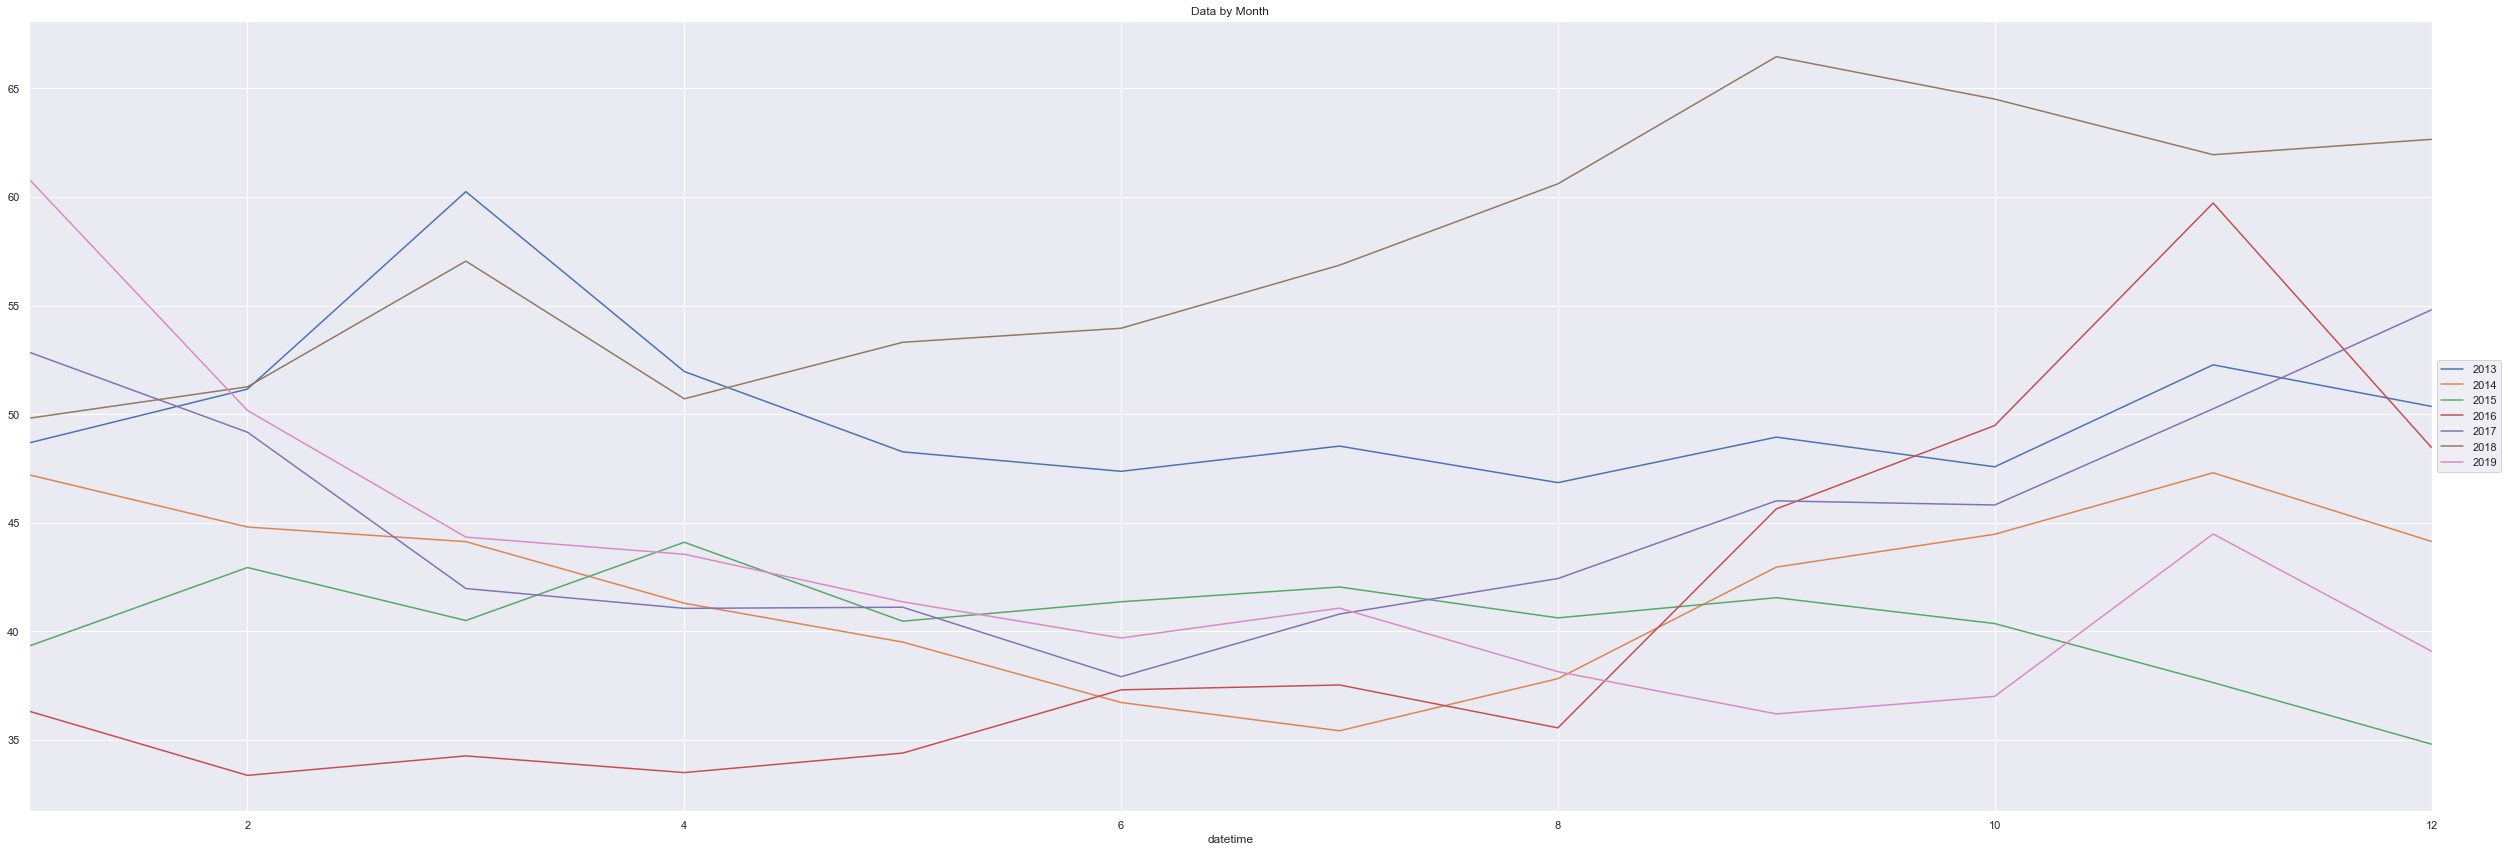

In [15]:
df_pivot = pd.pivot_table(result, index=result.index.month, columns=result.index.year, values='GBP/mWh')
ax = df_pivot.plot(title='Data by Month', figsize=(35, 12))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.figure.tight_layout()
plt.show()

# Natural Gas vs Electricity Prices

In [17]:
price_monthly = result.resample('MS')
month_mean = price_monthly.mean()

In [22]:
natgas = pd.read_csv('data/Natural Gas Futures Historical Data.csv')

vizualizer = Graphs()
natgas = vizualizer.clean_for_viz(natgas)

In [23]:
nat_gas_price_monthly = natgas.resample('MS')
nat_gas_month_mean = nat_gas_price_monthly.mean()

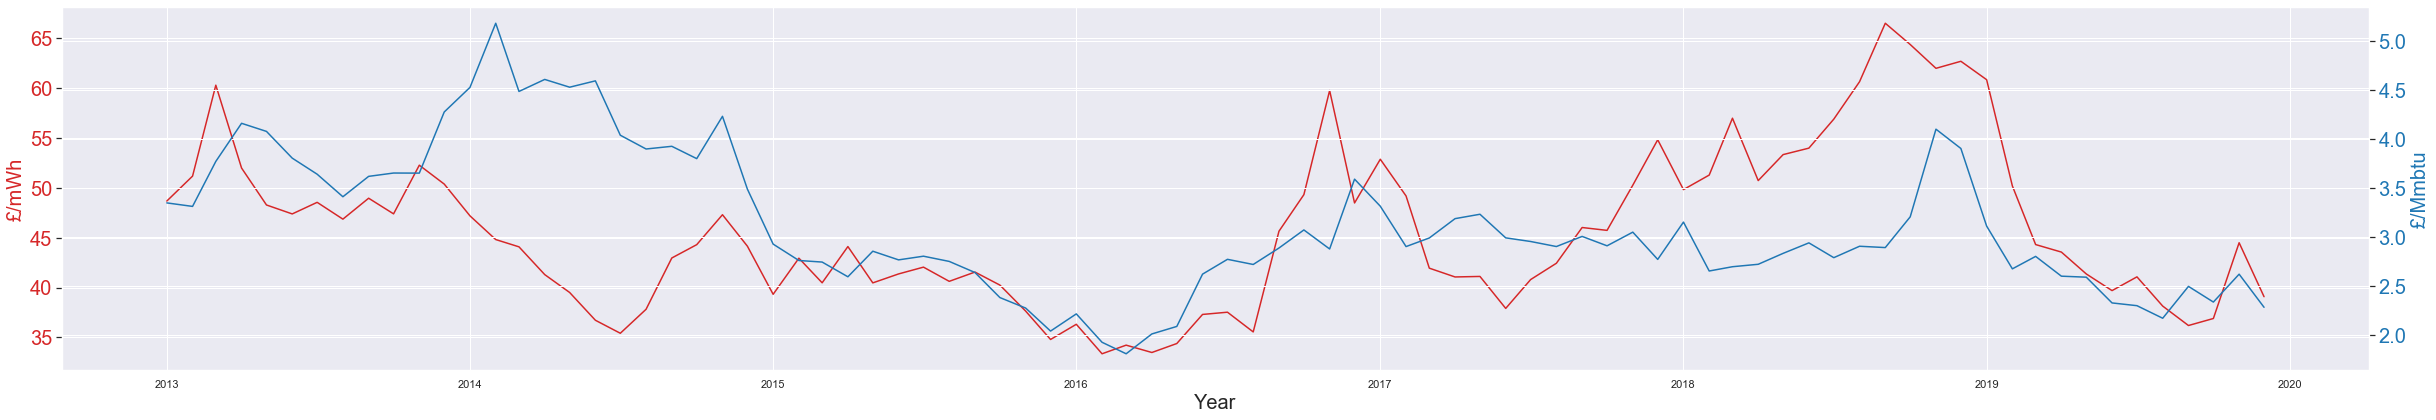

<Figure size 2520x864 with 0 Axes>

In [70]:
t = month_mean.index
data1 = month_mean['GBP/mWh']
data2 = nat_gas_month_mean['Price']

fig, ax1 = plt.subplots(figsize = (34,6))

color = 'tab:red'
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('£/mWh', color=color, fontsize=20)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('£/Mmbtu', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.savefig(fname = 'electricity_vs_naturalgas')

# Oil vs Electricity Prices

In [24]:
oil_gbp = pd.read_csv('data/Brent Oil Futures Historical Data.csv')

oil_gbp = vizualizer.clean_for_viz(oil_gbp)

oil_gbp_monthly = oil_gbp.resample('MS')
oil_gbp_month_mean = oil_gbp_monthly.mean()

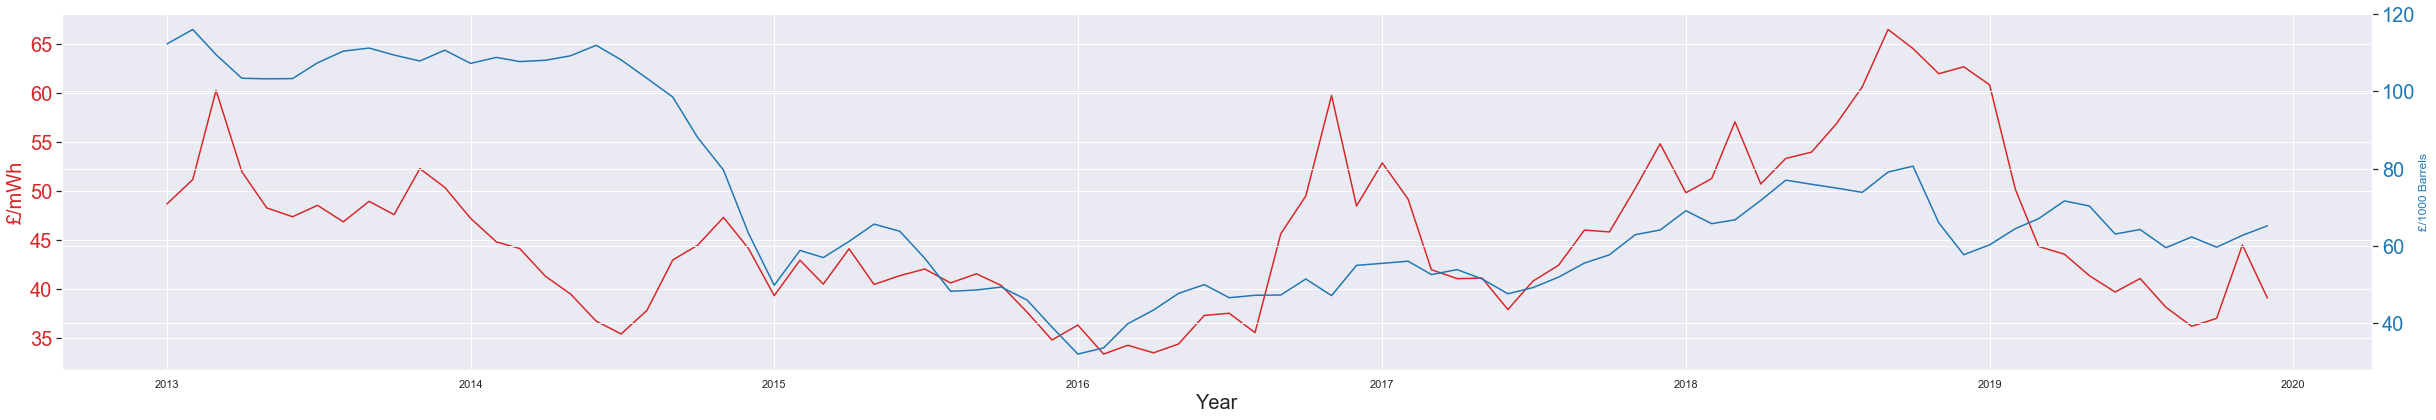

<Figure size 2520x864 with 0 Axes>

In [27]:
t = month_mean.index
data1 = month_mean['GBP/mWh']
data2 = oil_gbp_month_mean['Price']

fig, ax1 = plt.subplots(figsize = (34,6))

color = 'tab:red'
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('£/mWh', color=color, fontsize=20)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('£/1000 Barrels', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.savefig(fname = 'electricity_vs_oil')

# Uranium vs Electricity Prices

In [30]:
uranium = pd.read_csv('data/Uranium Futures Historical Data.csv')

uranium = vizualizer.clean_for_viz(uranium)


uranium_monthly = uranium.resample('MS')
uranium_month_mean = uranium_monthly.mean()


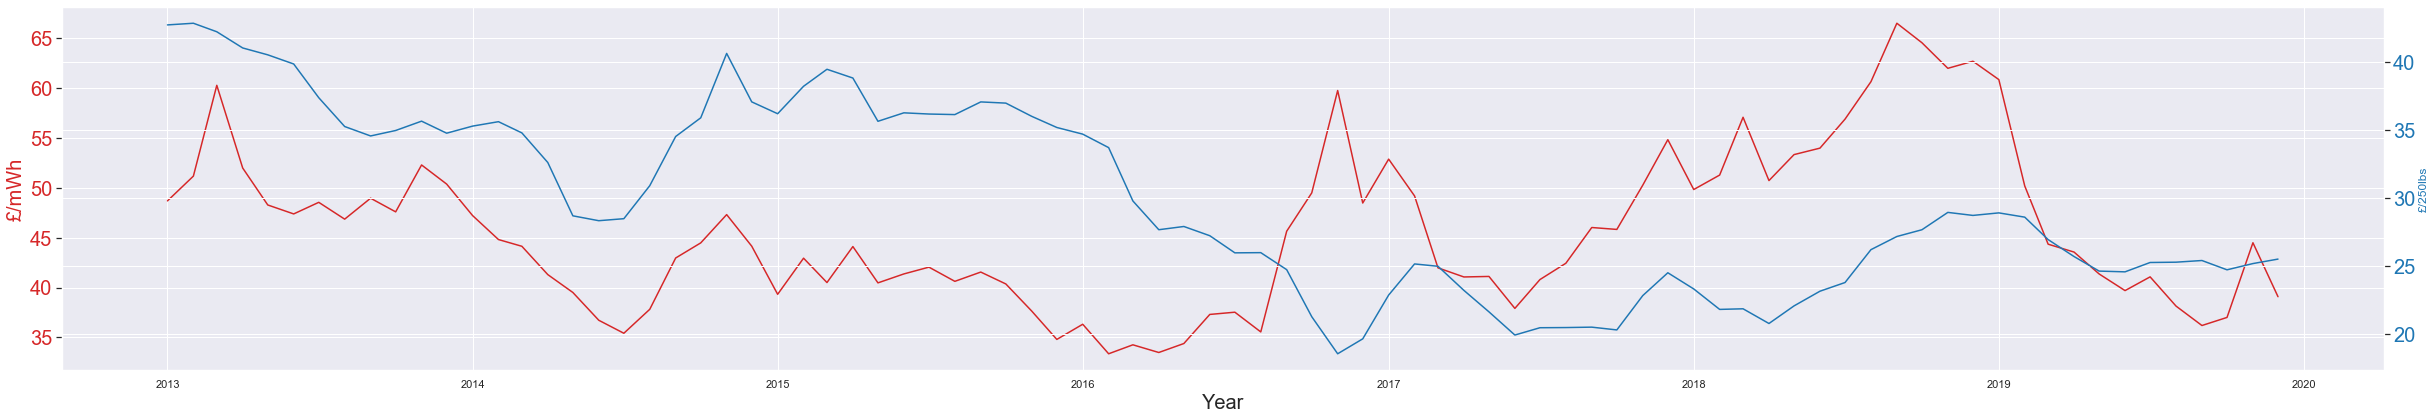

<Figure size 2520x864 with 0 Axes>

In [31]:
t = month_mean.index
data1 = month_mean['GBP/mWh']
data2 = uranium_month_mean['Price']

fig, ax1 = plt.subplots(figsize = (34, 6))

color = 'tab:red'
ax1.set_xlabel('Year', fontsize = 20)
ax1.set_ylabel('£/mWh', color=color,fontsize = 20)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('£/250lbs', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.savefig(fname = 'electricity_vs_uranium')

# Coal Prices Vs Electiricity Prices

In [32]:
coal = pd.read_csv('data/Newcastle Coal Futures Historical Data.csv')

coal = vizualizer.clean_for_viz(coal)


coal_monthly = coal.resample('MS')
coal_month_mean = coal_monthly.mean()

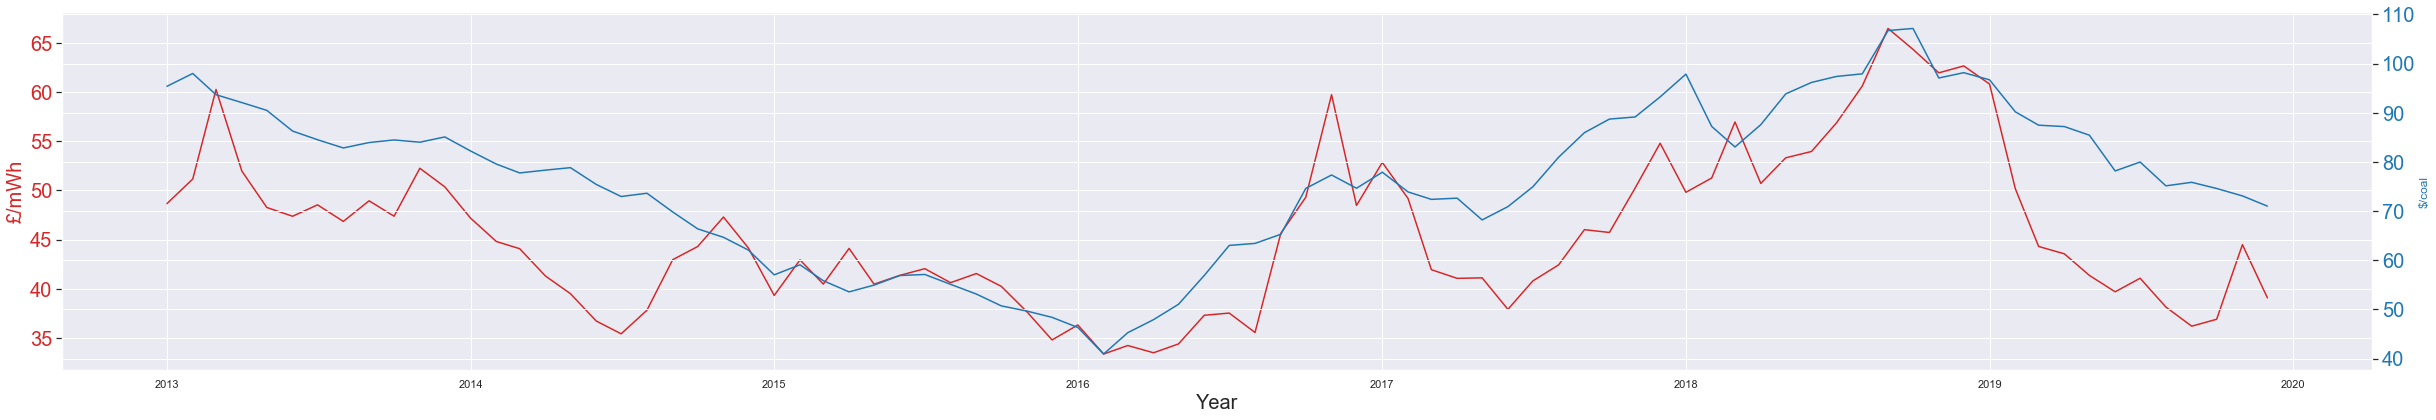

<Figure size 2520x864 with 0 Axes>

In [76]:
t = month_mean.index
data1 = month_mean['GBP/mWh']
data2 = coal_month_mean['Price']

fig, ax1 = plt.subplots(figsize = (34,6))

color = 'tab:red'
ax1.set_xlabel('Year', fontsize = 20)
ax1.set_ylabel('£/mWh', color=color, fontsize = 20)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$/coal', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.savefig(fname = 'electricity_vs_coal')

### Data Wrangling

#### The following section involves obtaining hourly weather data via an API, and subsequently adds this to the dataframe containing price. Subsequently it maps the daily natural resource data into hourly, to generate a full dataset from which we can begin modelling

In [33]:
list_of_hours = result.index
list_of_hours = list(list_of_hours)

api_formatted_datetimes = []

for key, hour in enumerate(list_of_hours):
    api_formatted_datetimes.append(str(list_of_hours[key])[:10] + 'T' + str(list_of_hours[key])[11:])

In [102]:
# Running this cell collects the hourly temperature for London from the DarkSky API and saves it to a pandas dataframe.

# import requests
# get_weather = WeatherGetter()

# weather_dicts = {}

# for hour in api_formatted_datetimes:
#     call = get_weather.weather_getter(hour)
#     result = call.json()
#     try:
#         weather_dicts[hour] = result['currently'].get('temperature') 
#     except:
#         weather_dicts[hour] = np.nan
        
        
        
# pd.DataFrame.from_dict(data=weather_dicts, orient='index').to_csv('weather_file.csv', header=False) 



In [103]:
# Read in weather CSV (from previous API call) and convert back to dictionary

weather = pd.read_csv('weather_file.csv', header = None)

weather[0] = weather[0].str.replace(r'T', ' ')
weather[0] = pd.to_datetime(weather[0])
weather.set_index(weather[0], inplace = True)
weather.drop(columns = 0, inplace = True)
weather_dict = weather.to_dict()
weather_dict = weather_dict[1]

result.reset_index(inplace = True) # Have to reset index for following map function to work properly


result['temperature'] = result['datetime'].map(weather_dict) # mapping weather onto df
result.reset_index(inplace = True)

### Adding all commodity values, and fixing missing values

In [111]:
list_of_commondities = [coal, oil_gbp, uranium, natgas] 
list_of_commodity_names = ['coal', 'oil', 'uranium', 'natural gas'] 

iteration = 0
for item in list_of_commondities:
    
    item = item.iloc[::-1]
    item.drop(columns = 'Change %', inplace = True)
    item_dict = item.to_dict()
    item_dict = item_dict['Price']
    result[str(list_of_commodity_names[iteration] + ' Price')] = result['datetime'].map(item_dict) # mapping weather onto df
    result[str(list_of_commodity_names[iteration]+ ' Price')].ffill(inplace = True)
    iteration += 1

    

In [113]:
# Hard coding final value as it was missed from original csv

result.set_value(0, 'coal Price', 95.59) 
result['coal Price'].ffill(inplace = True)

result.set_value(0, 'oil Price', 111.11) 
result['oil Price'].ffill(inplace = True)

result.set_value(0, 'uranium Price', 43.50) 
result['uranium Price'].ffill(inplace = True)

result.set_value(0, 'natural gas Price', 3.351) 
result['natural gas Price'].ffill(inplace = True)

result['temperature'].ffill(inplace = True)

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors i

## Exporting a clean dataset to a new CSV

In [122]:
result = result[:-1]
result.set_index('datetime', inplace = True)
result = result.drop(columns = ['level_0', 'index'])
# result.to_csv('re_fixed_multivariate_timeseires.csv')